# Getting data from the Twitter API

Many researchers today are looking to draw on the massive volume of data generated by Twitter users. With the *Twitter API for Academic Research* this is now easier than ever before: https://developer.twitter.com/en/products/twitter-api/academic-research


<span style="background-color: #FFFF00">**NOTE: You will only be able to run the code in this notebook if you have valid credentials for the Twitter API. You can read about how to apply through the link above.** There are still some useful lessons to be learned by reading through this notebook, however, so please continue.</span>

## What python packages do we need?

In this notebook, we use just two packages:

1. *tweepy* gives us a simple way to search the Twitter API.
2. *decouple* allows us to import and use API credentials provided by Twitter without revealing these in the code.

In [2]:
import tweepy
from decouple import AutoConfig

## How do we authenticate (log in) with the Twitter API

The following lines are used to *authenticate* with the Twitter API. We effectively log in so that we can conduct searches. This also allows Twitter to verify that we are not fetching too much data too quickly.

In [3]:
config = AutoConfig("../.env")

In [4]:
client = tweepy.Client(config("BEARER_TOKEN"))

## Searching Twitter

Now that we have *logged in* with the API, we can do our search. *tweepy* provides some *search_all_tweets* functionality, which you can read about below. Try to work out which of the options (or "Parameters") might be useful:

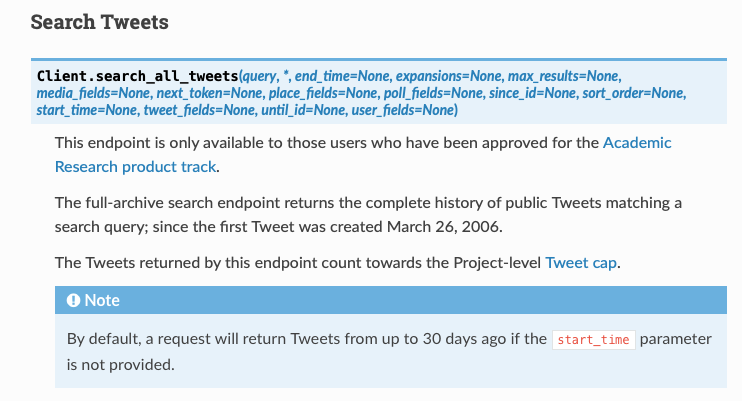

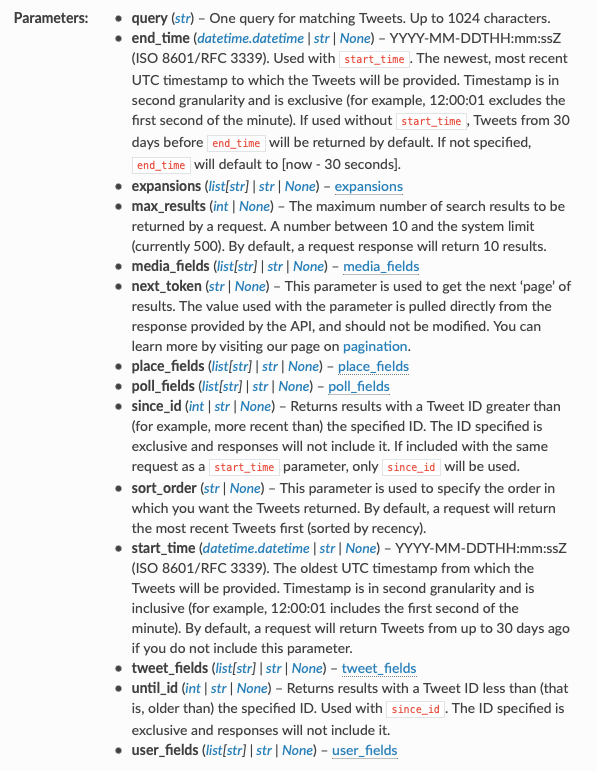

Now we perform our search, starting with a maximum of 30 results:

In [5]:
response = client.search_all_tweets("René Descartes", max_results=30)

The **response** that we get back contains both the search results and the associated metadata. We can access and print out just the search results with the following:

In [6]:
results = response.data

In [7]:
for tweet in results:
    print(f"ID: {tweet.id}: ", tweet.text)

ID: 1566608070511366144:  RT @noveliciouss: The #reading of all good #books is like conversation with the finest men of past centuries.
René Descartes
#writing https…
ID: 1566605181735026688:  RT @noveliciouss: The #reading of all good #books is like conversation with the finest men of past centuries.
René Descartes
#writing https…
ID: 1566598355706429447:  @dribeiro001 @AguerreOscar @Vanepetrillo René Descartes dijo que hay que dudar de los sentidos.
ID: 1566597940138893320:  RT @noveliciouss: The #reading of all good #books is like conversation with the finest men of past centuries.
René Descartes
#writing https…
ID: 1566597834979557377:  RT @noveliciouss: The #reading of all good #books is like conversation with the finest men of past centuries.
René Descartes
#writing https…
ID: 1566597663486795776:  "quer cantar canção de amor pra iludir a gata bl vai te passar as visão do quebrada
ta fudidooo ta fudidooo
mulher gosta dos maloka com cara de bandido"
-rene descartes https://t.co/ju

We can also look at the metadata attached to the search. Importantly, this includes a `next_token`, which we need to get the next lot of 30 results.

In [8]:
response.meta

{'newest_id': '1566608070511366144',
 'oldest_id': '1566565599525888000',
 'result_count': 30,
 'next_token': 'b26v89c19zqg8o3fpz8mf6sundgvexmtawyzjjp51fiil'}

We can get the next 30 results as follows:

In [9]:
next_token = response.meta["next_token"]

In [10]:
next_results = client.search_all_tweets("René Descartes", max_results=30, next_token=next_token)

In [12]:
for tweet in next_results.data:
    print(f"ID: {tweet.id}: ", tweet.text)

ID: 1566564283126878210:  "🎯 “Daría todo lo que sé, por la mitad de lo que ignoro.” - René Descartes"
ID: 1566563710096769025:  Frase célebre de René Descartes, padre de la filosofía moderna Frase célebre de René Descartes, padre de la filosofía moderna Frase célebre de René Descartes, padre de la filosofía moderna #citacion #frases #frasesdeamor #frasesdevida … via... https://t.co/0cPqxyRMJl
ID: 1566561955443515392:  RT @noveliciouss: The #reading of all good #books is like conversation with the finest men of past centuries.
René Descartes
#writing https…
ID: 1566561758273314816:  Frase célebre de René Descartes, padre de la filosofía moderna Frase célebre de René Descartes, padre de la filosofía moderna Frase célebre de René Descartes, padre de la filosofía moderna #citacion #frases #frasesdeamor #frasesdevida … via... https://t.co/kLndAcUCBp
ID: 1566561193258516480:  Frase célebre de René Descartes, padre de la filosofía moderna Frase célebre de René Descartes, padre de la filosofía

# Question

Clearly we don't want to get every *page* of results one at a time. How would you approach automating this process to get all results for a given search term?